In [3]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [76]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [ ]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [100]:
#import the WHOLE dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

21700000

In [4]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [5]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21691 entries, 0 to 21690
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21691 non-null  int64  
 1   app_id                          21691 non-null  int64  
 2   app_name                        21691 non-null  object 
 3   review_id                       21691 non-null  int64  
 4   language                        21691 non-null  object 
 5   review                          21657 non-null  object 
 6   timestamp_created               21691 non-null  int64  
 7   timestamp_updated               21691 non-null  int64  
 8   recommended                     21691 non-null  bool   
 9   votes_helpful                   21691 non-null  int64  
 10  votes_funny                     21691 non-null  int64  
 11  weighted_vote_score             21691 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,796,292030,The Witcher 3: Wild Hunt,85029982,polish,super gierka jd,1611145712,1611145712,True,0,...,True,False,False,76561198275278875,14,6,6077.0,2614.0,5852.0,1.611354e+09
1,1139,292030,The Witcher 3: Wild Hunt,84964490,turkish,Bu oyunu oynamayan sonradan pişman olur 10/10,1611044972,1611044972,True,1,...,True,False,False,76561198837837124,15,3,1088.0,979.0,647.0,1.611256e+09
2,1594,292030,The Witcher 3: Wild Hunt,84872230,polish,Bardzo fajna gra\npolecam\n,1610915070,1610915070,True,0,...,True,False,False,76561199011242337,3,1,711.0,180.0,711.0,1.610906e+09
3,1729,292030,The Witcher 3: Wild Hunt,84849222,schinese,为了女儿刷了两次.剧情很好,1610887690,1610887690,True,0,...,True,False,False,76561198973187001,60,20,5369.0,3923.0,4582.0,1.611326e+09
4,4829,292030,The Witcher 3: Wild Hunt,84349385,japanese,JRPGしかやったことなく洋ゲーに手を出してみたい方におすすめですね,1610187216,1610187216,True,0,...,True,False,False,76561198995660201,22,3,1586.0,727.0,858.0,1.611324e+09


In [6]:
#df.duplicated() #Returns a boolean Series denoting duplicate rows
index=0
for i in df.duplicated():
    if i==True: print(index, "is duplicated")
    index+=1

In [7]:
df.memory_usage( )

Index                                128
Unnamed: 0                        173528
app_id                            173528
app_name                          173528
review_id                         173528
language                          173528
review                            173528
timestamp_created                 173528
timestamp_updated                 173528
recommended                        21691
votes_helpful                     173528
votes_funny                       173528
weighted_vote_score               173528
comment_count                     173528
steam_purchase                     21691
received_for_free                  21691
written_during_early_access        21691
author.steamid                    173528
author.num_games_owned            173528
author.num_reviews                173528
author.playtime_forever           173528
author.playtime_last_two_weeks    173528
author.playtime_at_review         173528
author.last_played                173528
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            34
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         21
author.last_played                 0
dtype: int64

<AxesSubplot:>

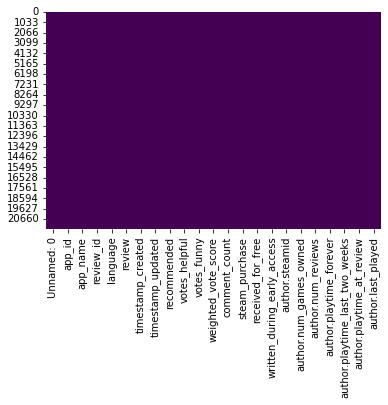

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

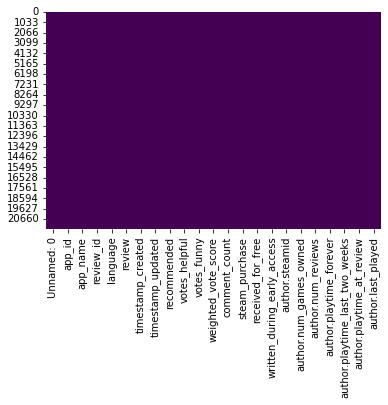

In [10]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

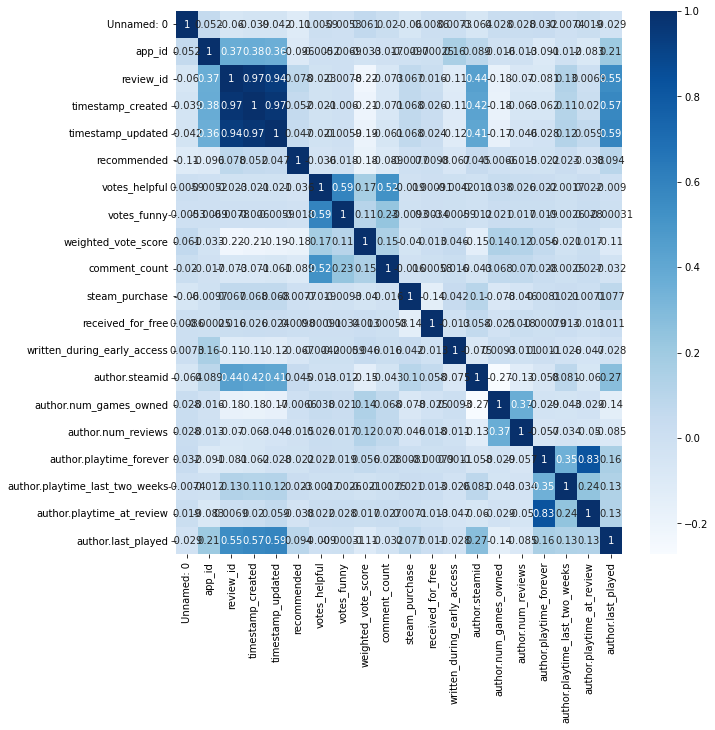

In [11]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

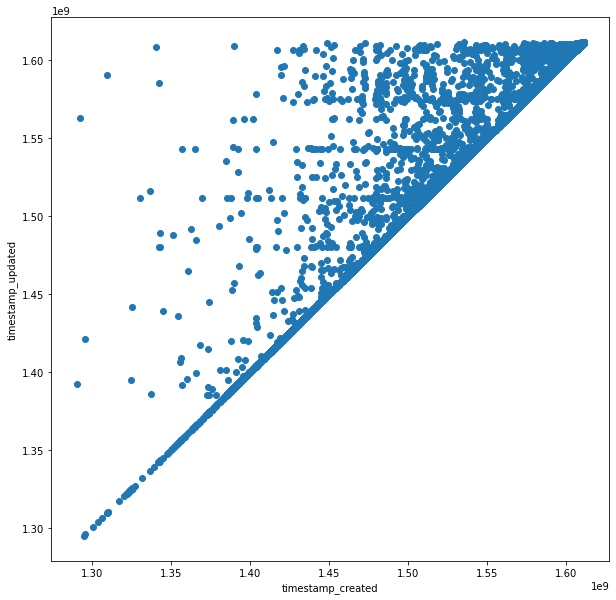

In [12]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [13]:
df["app_name"].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS       1680
Grand Theft Auto V                   956
Tom Clancy's Rainbow Six Siege       859
Terraria                             680
Garry's Mod                          678
                                    ... 
Eco                                    1
Out of the Park Baseball 19            1
Slipstream                             1
BERSERK and the Band of the Hawk       1
CHRONO TRIGGER                         1
Name: app_name, Length: 311, dtype: int64

/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

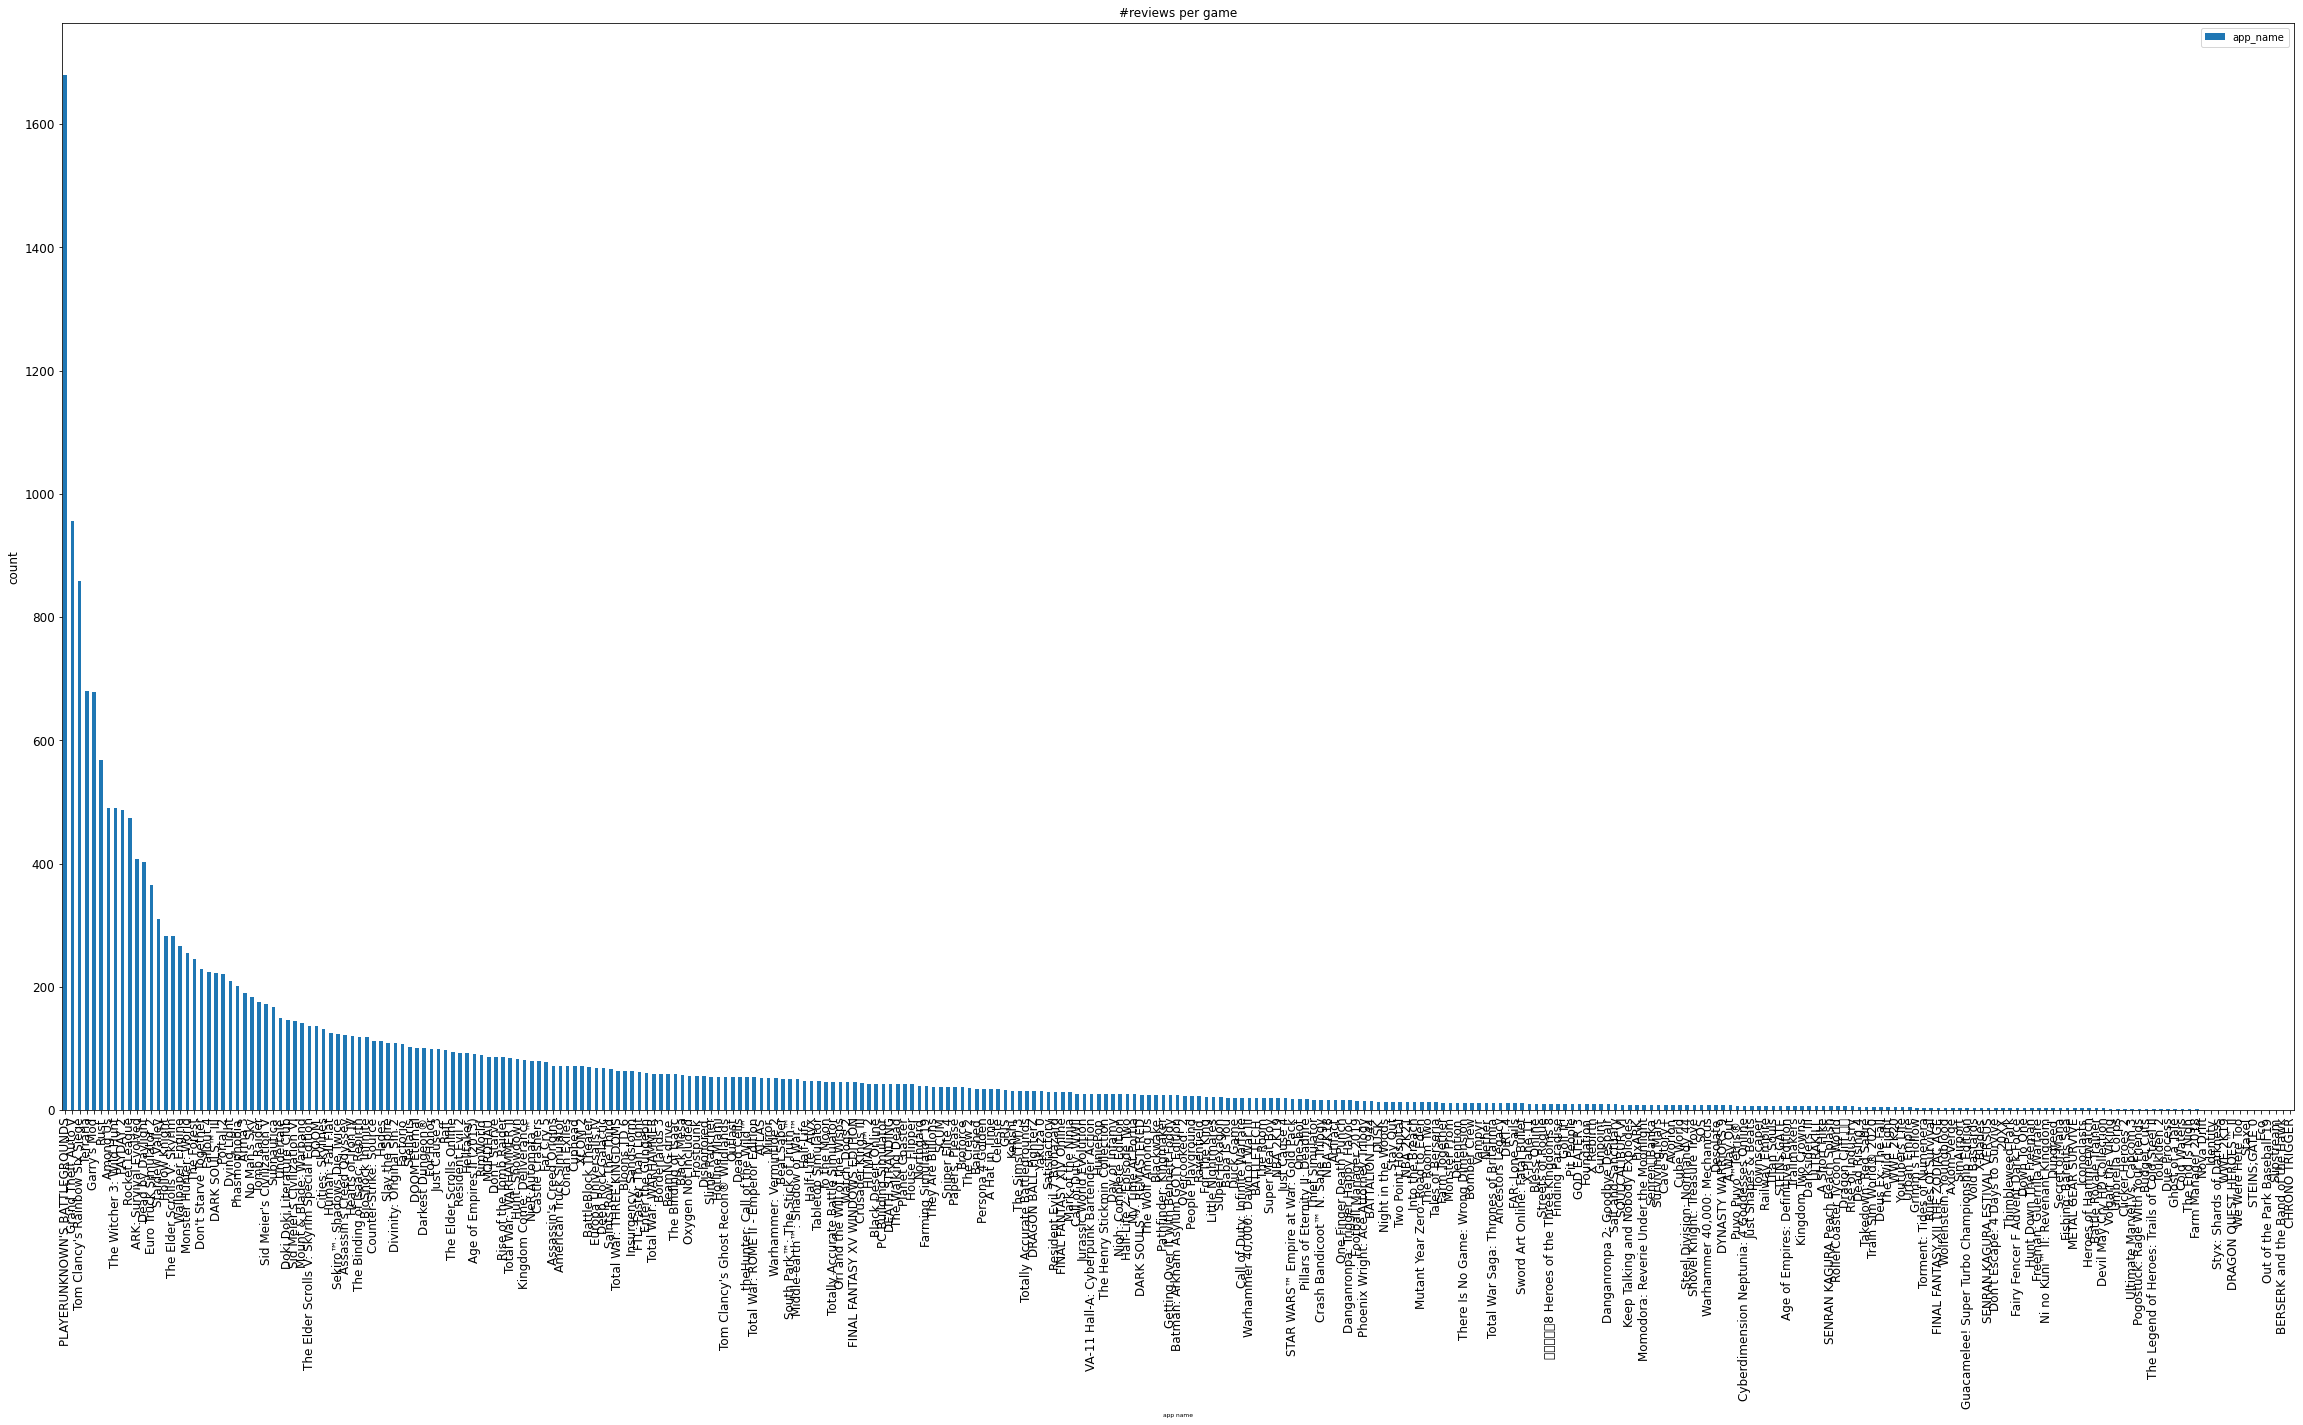

In [14]:
#The only way to read the names is by saving the image and then zooming in
ax=df["app_name"].value_counts().plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=6)
ax.set_ylabel("count", fontsize=12)
plt.show()

### What applications have the best Weighted Vote Score?

In [15]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [16]:
#Here we just pick the 10 games with the highest absolute score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
15481,Monster Hunter: World,0.992500
670,Half-Life 2: Episode Two,0.977236
148,The Witcher 3: Wild Hunt,0.967475
20094,NieR:Automata™,0.966098
3568,Enter the Gungeon,0.965726
8921,Doki Doki Literature Club,0.962981
3868,RimWorld,0.926114
9079,Slime Rancher,0.925771
2815,The Forest,0.923731
9344,Mirror,0.923097


In [17]:
#MEAN METHOD 
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
BERSERK and the Band of the Hawk,0.626371
Ghost of a Tale,0.608037
STEINS;GATE 0,0.561753
Styx: Shards of Darkness,0.555031
DRAGON QUEST HEROES™ II,0.553314
Urban Empire,0.546589
Identity,0.523810
Staxel,0.516376
Slipstream,0.507772


### Which applications have the most and the least recommendations?
### How many of these applications were purchased, and how many were given for free?

In [18]:
#the 2 questions are done together
rec=df.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [19]:
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,3,3,0
A Hat in Time,34,26,2
A Short Hike,6,4,1
A Way Out,8,5,0
ARK: Survival Evolved,331,326,8
...,...,...,...
XCOM 2,57,48,1
Yakuza 0,29,24,1
Youtubers Life,2,5,0


<AxesSubplot:xlabel='app_name'>

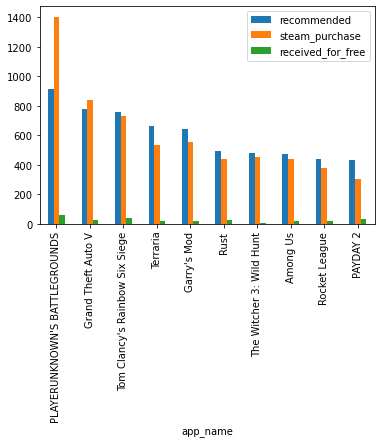

In [20]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

<AxesSubplot:xlabel='app_name'>

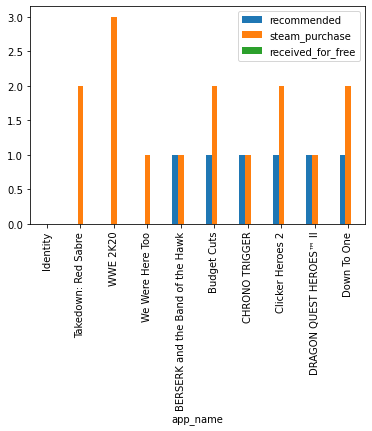

In [21]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')